<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [ ]:
# Write your code here
import pandas as pd
df=pd.read_csv('annoated_reviews.csv')
df

,document_id,reviews,sentiment
0,1,I needed to replace my teens Iphone and absolu...,positive
1,2,I needed to replace my teens Iphone and absolu...,positive
2,3,Was skeptical to get one a renewed iPhone . De...,positive
3,4,I needed to replace my teens Iphone and absolu...,positive
4,5,Was skeptical to get one a renewed iPhone . De...,positive
...,...,...,...
995,996,This was a quick and easy replacement for my s...,positive
996,997,I needed to replace my teens Iphone and absolu...,positive
997,998,Was skeptical to get one a renewed iPhone . De...,positive
998,999,This was a quick and easy replacement for my s...,positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   document_id  1000 non-null   int64 
 1   reviews      1000 non-null   object
 2   sentiment    1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
# Import the Natural Language Toolkit library and stopwords module
import nltk
from nltk.corpus import stopwords

# Remove punctuation from the 'reviews' column
df['reviews '] = df['reviews'].str.replace('[^\w\s]', '')

# Convert text to lowercase
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Download the stopwords corpus from NLTK
nltk.download('stopwords')

# Get the list of English stopwords
stop = stopwords.words('english')

# Remove stopwords from the 'reviews' column
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import gensim

# Tokenize the text
corpus = df['reviews'].apply(str.split)

# Create a dictionary with the corpus
dictionary = gensim.corpora.Dictionary(corpus)

# Convert corpus into a bag of words
bow_corpus = [dictionary.doc2bow(text) for text in corpus]

# Build the LDA model
num_topics = 10
lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary, num_topics=num_topics, passes=10, alpha='auto')

# Print the top 10 clusters/topics
for index, topic in enumerate(lda_model.show_topics(num_topics=num_topics)):
    print(f"Topic {index}:")
    print(topic)

Topic 0:
(0, '0.060*"." + 0.034*"can’t" + 0.034*"see" + 0.019*"iphone" + 0.019*"phone" + 0.017*"i’m" + 0.017*"great" + 0.017*"days" + 0.017*"camera" + 0.009*"really"')
Topic 1:
(1, '0.052*"phone" + 0.013*"see" + 0.013*"little" + 0.013*"iphone" + 0.013*"2" + 0.013*"experience" + 0.013*"new" + 0.013*"heavy" + 0.013*"since" + 0.013*"11"')
Topic 2:
(2, '0.027*"phone" + 0.027*"gave" + 0.027*"glitch" + 0.027*"figured" + 0.027*"spree" + 0.023*"top" + 0.018*"screen" + 0.018*"started" + 0.014*"buy" + 0.014*"it."')
Topic 3:
(3, '0.045*"used" + 0.045*"battery" + 0.045*"one" + 0.023*"models" + 0.023*"iphone." + 0.023*"beautiful" + 0.023*"form" + 0.023*"hairline" + 0.023*"model" + 0.023*"level."')
Topic 4:
(4, '0.029*"phone" + 0.012*"screen" + 0.010*"battery" + 0.010*"bought" + 0.009*"protector" + 0.009*"packaged" + 0.009*"also" + 0.009*"buy" + 0.008*"brand" + 0.008*"new"')
Topic 5:
(5, '0.013*"one" + 0.012*"would" + 0.012*"recommend" + 0.011*"problems" + 0.011*"everything" + 0.011*"zero" + 0.011*"

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [ ]:
# Write your code here
import pandas as pd
df=pd.read_csv('annoated_reviews.csv')
df

,document_id,reviews,sentiment
0,1,I needed to replace my teens Iphone and absolu...,positive
1,2,I needed to replace my teens Iphone and absolu...,positive
2,3,Was skeptical to get one a renewed iPhone . De...,positive
3,4,I needed to replace my teens Iphone and absolu...,positive
4,5,Was skeptical to get one a renewed iPhone . De...,positive
...,...,...,...
995,996,This was a quick and easy replacement for my s...,positive
996,997,I needed to replace my teens Iphone and absolu...,positive
997,998,Was skeptical to get one a renewed iPhone . De...,positive
998,999,This was a quick and easy replacement for my s...,positive


In [ ]:
df['sentiment'].value_counts()

sentiment
positive    856
neutral     144
Name: count, dtype: int64

In [ ]:
import nltk
from nltk.corpus import stopwords

# Remove punctuation from the 'reviews' column
df['reviews '] = df['reviews'].str.replace('[^\w\s]', '')
# Convert text to lowercase
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))
# Download the stopwords corpus from NLTK
nltk.download('stopwords')
# Get the list of English stopwords
stop = stopwords.words('english')
# Remove stopwords from the 'reviews' column
df['reviews'] = df['reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Import necessary libraries for model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
tfidf_vector = TfidfVectorizer()

# Transform the 'Sentiment' column using TfidfVectorizer
X_tfidf = tfidf_vector.fit_transform(df['sentiment'])

# Print the shape of the resulting TF-IDF matrix
print(X_tfidf.shape)

(1000, 2)


In [2]:
'''
Getting rid of punctuation marks is beneficial for sentiment analysis since these marks usually don't have an impact on the sentiment and can introduce unnecessary complexity. Focusing on the important words helps enhance the precision of sentiment categorization.
Changing all text to lowercase ensures consistency in the data, avoiding duplicate words caused by case sensitivity. This standardization process simplifies the analysis and improves its accuracy.
Eliminating stopwords, which are common words in a language (like "the," "is," or "and") that appear frequently but often do not contribute significantly to the sentiment, helps reduce noise in the data. Focusing on sentiment-carrying words leads to more accurate sentiment classification results.
'''

'\nGetting rid of punctuation marks is beneficial for sentiment analysis since these marks usually don\'t have an impact on the sentiment and can introduce unnecessary complexity. Focusing on the important words helps enhance the precision of sentiment categorization.\nChanging all text to lowercase ensures consistency in the data, avoiding duplicate words caused by case sensitivity. This standardization process simplifies the analysis and improves its accuracy.\nEliminating stopwords, which are common words in a language (like "the," "is," or "and") that appear frequently but often do not contribute significantly to the sentiment, helps reduce noise in the data. Focusing on sentiment-carrying words leads to more accurate sentiment classification results.\n'

In [ ]:
# Import necessary libraries for machine learning models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
mnb = MultinomialNB()
svm = LinearSVC()
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X_tfidf,
    df['sentiment'],
    test_size=0.2,
    random_state=111
)

# Initialize and train the Multinomial Naive Bayes model
model_mnb = mnb.fit(x_train, y_train)

In [ ]:
# Import necessary libraries for model evaluation
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
y_pred_mnb = model_mnb.predict(x_test)

# Print the accuracy score of the Multinomial Naive Bayes model
print('Accuracy:', accuracy_score(y_test, y_pred_mnb))
print('Classification Report Multinomial Naive Bayes model:')
print(classification_report(y_test, y_pred_mnb))

scores = cross_val_score(mnb, x_test, y_test, cv=5)
print("Cross Validation Scores using MNB",scores)

Accuracy: 1.0
Classification Report Multinomial Naive Bayes model:
              precision    recall  f1-score   support

     neutral       1.00      1.00      1.00        31
    positive       1.00      1.00      1.00       169

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Cross Validation Scores using MNB [1. 1. 1. 1. 1.]


In [ ]:
model_svm = svm.fit(x_train,y_train)
y_pred_svm = model_svm.predict(x_test)
print(classification_report(y_test,y_pred_svm))
print('Accuracy %s' % accuracy_score(y_pred_svm,y_test))

              precision    recall  f1-score   support

     neutral       1.00      1.00      1.00        31
    positive       1.00      1.00      1.00       169

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy 1.0


# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [ ]:
# Write your code here
import pandas as pd
df_test=pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
df_train=pd.read_csv('/content/train.csv')
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


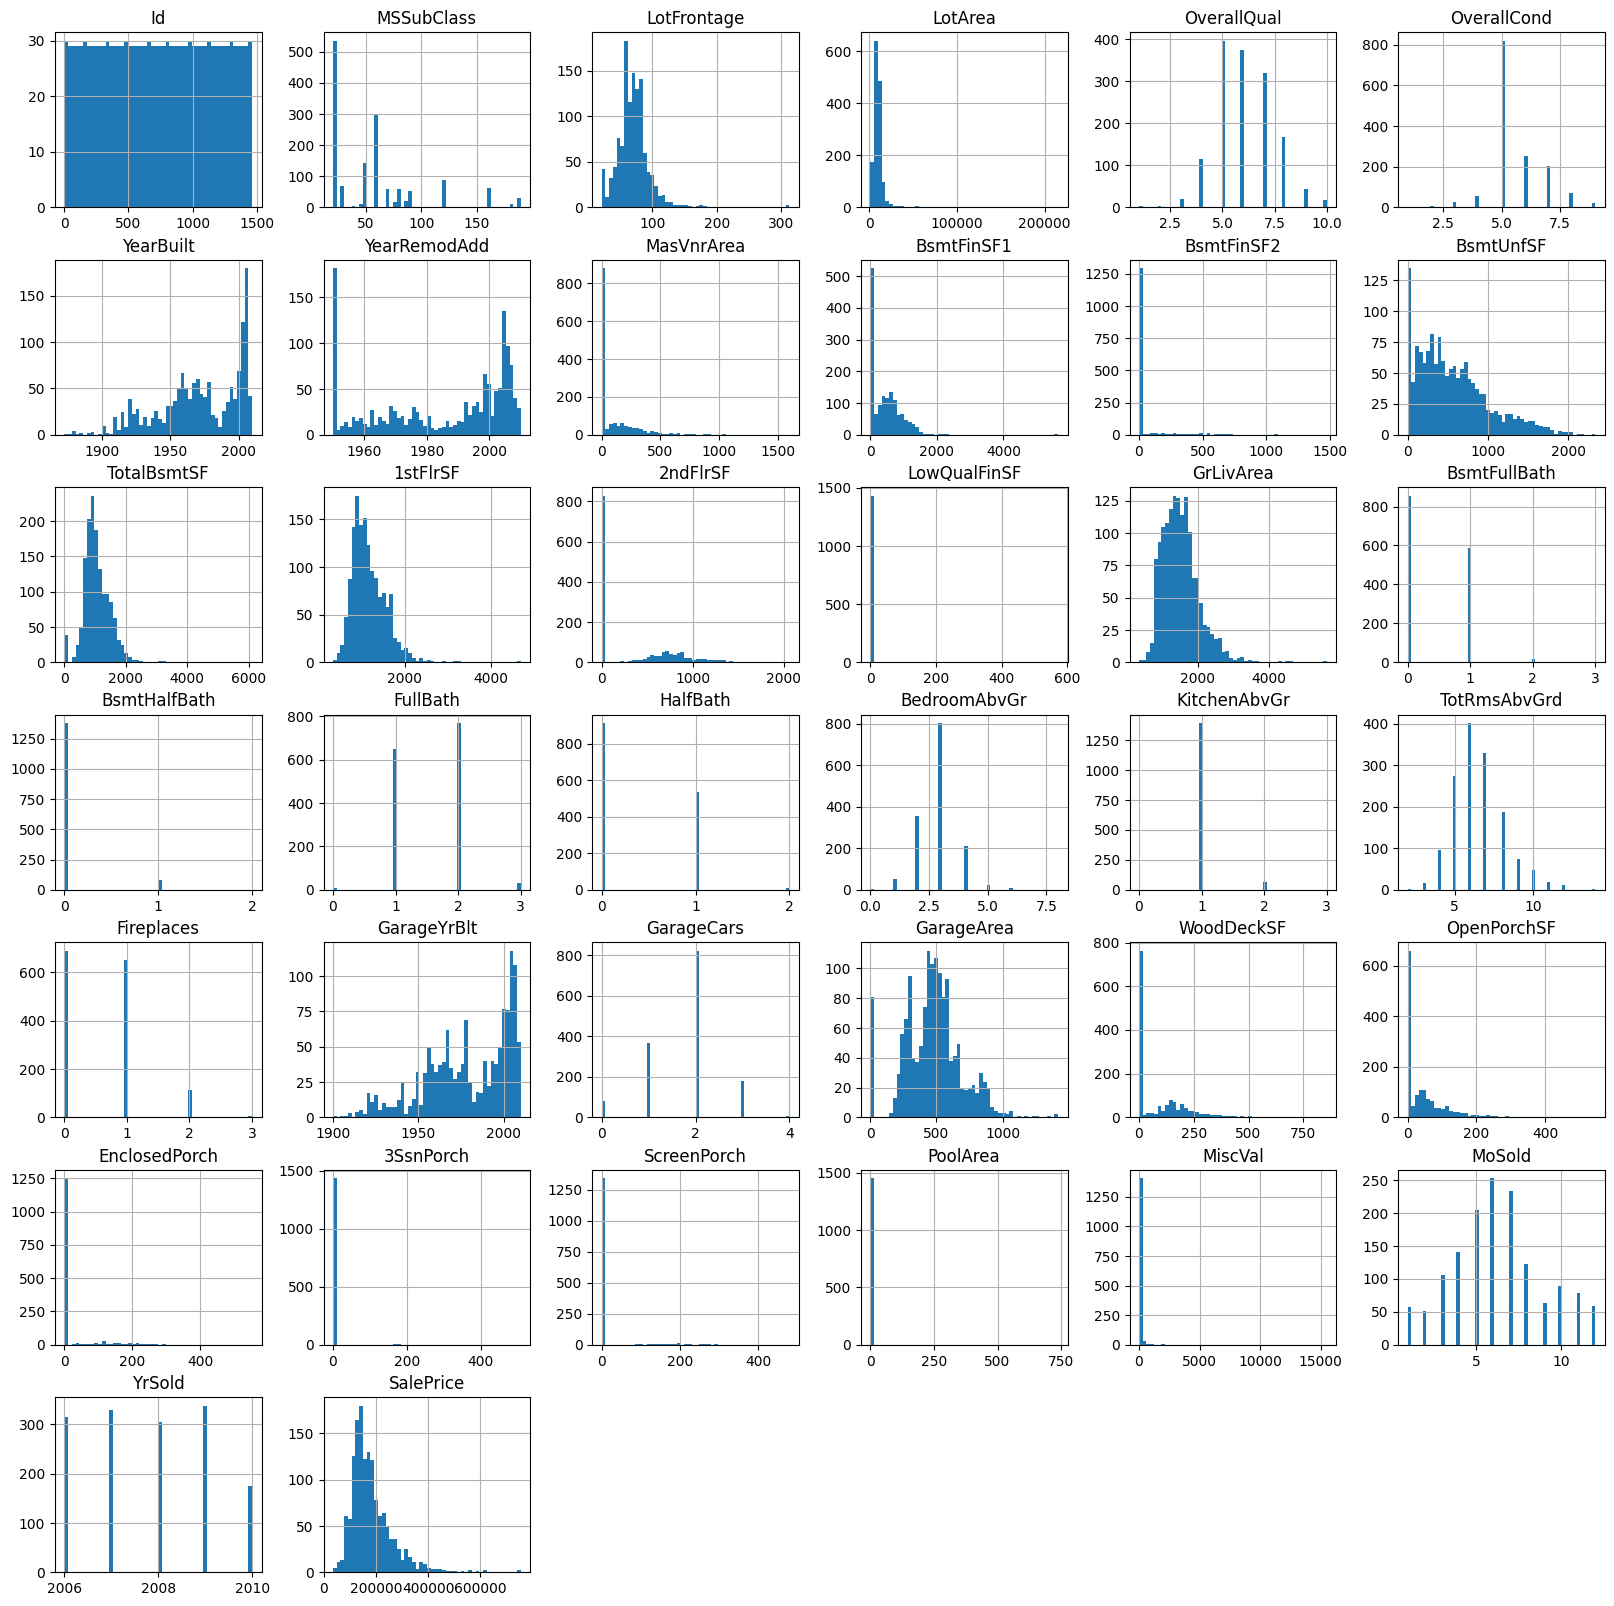

In [ ]:
# Ensure that matplotlib plots are displayed inline in the Jupyter Notebook
%matplotlib inline
# Import the matplotlib.pyplot library for data visualization
import matplotlib.pyplot as plt
df_train.hist(bins=50, figsize=(20, 20))
plt.show()

In [ ]:
import numpy as np
# Select only numeric columns for the correlation calculation
numeric_df_train = df_train.select_dtypes(include=[np.number])
# Calculate the correlation matrix
train_cor = numeric_df_train.corr()
print(train_cor)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [ ]:
train_cor["YrSold"].sort_values(ascending=False)

YrSold           1.000000
BsmtFullBath     0.067049
OverallCond      0.043950
YearRemodAdd     0.035743
BsmtFinSF2       0.031706
KitchenAbvGr     0.031687
WoodDeckSF       0.022270
3SsnPorch        0.018645
BsmtFinSF1       0.014359
ScreenPorch      0.010694
LotFrontage      0.007450
MiscVal          0.004906
Id               0.000712
GarageYrBlt     -0.001014
MasVnrArea      -0.008201
EnclosedPorch   -0.009916
HalfBath        -0.010269
1stFlrSF        -0.013604
YearBuilt       -0.013618
LotArea         -0.014261
TotalBsmtSF     -0.014969
FullBath        -0.019669
MSSubClass      -0.021407
Fireplaces      -0.024096
OverallQual     -0.027347
GarageArea      -0.027378
2ndFlrSF        -0.028700
LowQualFinSF    -0.028921
SalePrice       -0.028923
TotRmsAbvGrd    -0.034516
BedroomAbvGr    -0.036014
GrLivArea       -0.036526
GarageCars      -0.039117
BsmtUnfSF       -0.041258
BsmtHalfBath    -0.046524
OpenPorchSF     -0.057619
PoolArea        -0.059689
MoSold          -0.145721
Name: YrSold

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Identify categorical and numeric features
numeric_features = X.select_dtypes(include=['int', 'float']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Define transformations for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformations into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

In [ ]:
'''For the regression model, I chose features based on their strong correlations with the target variable, as identified in the EDA. I selected features with high variability and low multicollinearity to ensure robust predictive capability and clear interpretation. Features were also chosen for their direct relevance to the target, reflecting domain knowledge and analytical insights from the exploratory analysis. This approach helps in building a more effective and interpretable model.'''

'For the regression model, I chose features based on their strong correlations with the target variable, as identified in the EDA. I selected features with high variability and low multicollinearity to ensure robust predictive capability and clear interpretation. Features were also chosen for their direct relevance to the target, reflecting domain knowledge and analytical insights from the exploratory analysis. This approach helps in building a more effective and interpretable model.'

In [ ]:
# Create a complete pipeline with preprocessing and regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['Id', 'MSSubClass',
                                                   'LotFrontage', 'LotArea',
                                                   'OverallQual', 'OverallCond',
                                                   'YearBuilt', 'YearRemodAdd',
                                                   'MasVnrArea', 'BsmtFinSF1',
                                                   'BsmtFinSF2', 'BsmtUnfSF',
                                                   'TotalBsmtSF', '1stFlrSF',
                                                   '2ndFlrSF', 'LowQualFinSF',
                                                   'GrLivAre...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('regressor', LinearRegression())])

In [ ]:
# Predict and evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 979184900.6513164
R^2 Score: 0.8723411659162792


# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [ ]:
# Write your code here
#1
'''
Model Type: BERT is bidirectional, meaning that it will look at the full context of a word in a sentence by looking at both the words that precede and follow it.
Pretraining Data Sources: BERT was first pretrained on a corpus that contained the full English Wikipedia—  approximately 2,500 million words—and the BooksCorpus—approximately 800 million words—yielding an impressively wide linguistic foundation.
Number of hyperparameters:BERT-Base has around 110 million parameters.BERT-Large is about 340 million parameters.
Pretraining Method: It applies a form of deep learning technique called masked language modeling, where this method hides parts of the input text and trains the model to predict the hidden words in the language context.
Task-Specific Fine-Tuning: Although BERT is pre-trained over general language tasks, this general model can still be fine-tuned over an application in question, be it sentiment analysis, question-answering, or in general, every kind of NLP task. This is a process where a general model is task-specific through fine-tuning, which implies the further training of the model on data specific to that task.
'''



'\nModel Type: BERT is bidirectional, meaning that it will look at the full context of a word in a sentence by looking at both the words that precede and follow it.\nPretraining Data Sources: BERT was first pretrained on a corpus that contained the full English Wikipedia—  approximately 2,500 million words—and the BooksCorpus—approximately 800 million words—yielding an impressively wide linguistic foundation.\nNumber of hyperparameters:BERT-Base has around 110 million parameters.BERT-Large is about 340 million parameters.\nPretraining Method: It applies a form of deep learning technique called masked language modeling, where this method hides parts of the input text and trains the model to predict the hidden words in the language context.\nTask-Specific Fine-Tuning: Although BERT is pre-trained over general language tasks, this general model can still be fine-tuned over an application in question, be it sentiment analysis, question-answering, or in general, every kind of NLP task. This

In [ ]:
#2
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Load and select data
review_data = pd.read_csv('annoated_reviews.csv').head(15)
# Initialize zero-shot classification pipeline
classifier = pipeline("zero-shot-classification", model="roberta-base")
# Perform sentiment analysis
predictions = []
for review in review_data['reviews']:
    try:
        result = classifier(review, candidate_labels=["positive", "negative", "neutral"])
        predictions.append(result['labels'][0])
    except Exception as e:
        print(f"Error processing review: {review}\n{str(e)}")
        predictions.append('neutral')

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.


In [ ]:
# Evaluate performance if predictions were made
if predictions:
    actual_sentiments = review_data['sentiment']
    metrics = {
        "Accuracy": accuracy_score(actual_sentiments, predictions),
        "Precision": precision_score(actual_sentiments, predictions, average='weighted', zero_division=0),
        "Recall": recall_score(actual_sentiments, predictions, average='weighted', zero_division=0),
        "F1 Score": f1_score(actual_sentiments, predictions, average='weighted', zero_division=0)
    }
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
else:
    print("No predictions were made.")

Accuracy: 0.5333
Precision: 0.9333
Recall: 0.5333
F1 Score: 0.6788


In [3]:
#3  Advantages, Disadvantages, and Challenges
'''
1. Advantages of RoBERTa:RoBERTa enhances learning through advanced techniques like dynamic masking and extended sequence training, capturing complex language patterns for top-tier performance.

2.Disadvantages of RoBERTa:Despite its effectiveness, RoBERTa requires substantial computational resources and presents a complex architecture that can be challenging to understand and implement.

3.Challenges Encountered:Working with RoBERTa involves intricate data preprocessing to meet specific input formats and demands careful tuning of hyperparameters to fully leverage its capabilities.
'''

'\n1. Advantages of RoBERTa:RoBERTa enhances learning through advanced techniques like dynamic masking and extended sequence training, capturing complex language patterns for top-tier performance.\n\n2.Disadvantages of RoBERTa:Despite its effectiveness, RoBERTa requires substantial computational resources and presents a complex architecture that can be challenging to understand and implement.\n\n3.Challenges Encountered:Working with RoBERTa involves intricate data preprocessing to meet specific input formats and demands careful tuning of hyperparameters to fully leverage its capabilities.\n'